In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
G = nx.read_gml('internet/as-22july06.gml')

In [3]:
type(G)

networkx.classes.graph.Graph

In [4]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is directed? {G.is_directed()}")

Number of nodes: 22963
Number of edges: 48436
Is directed? False


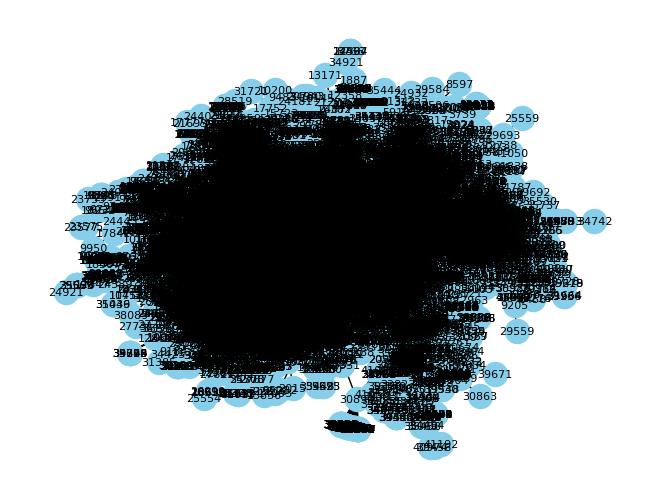

In [25]:
nx.draw(G, with_labels=True,node_size=300, node_color='skyblue', font_size=8)

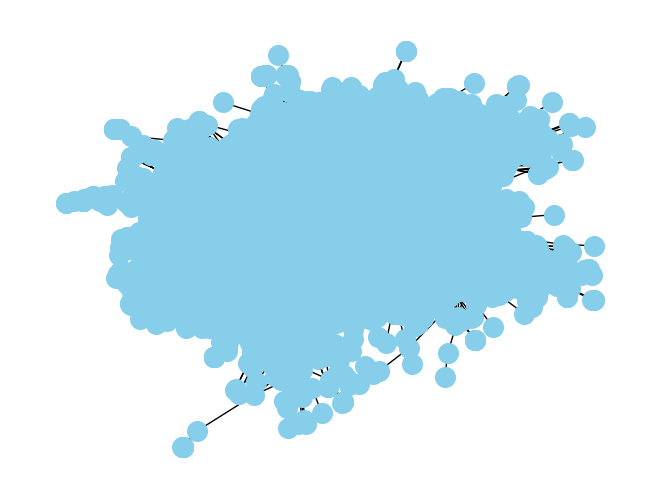

In [ ]:
nx.draw(G, with_labels=False,node_size=200, node_color='skyblue')

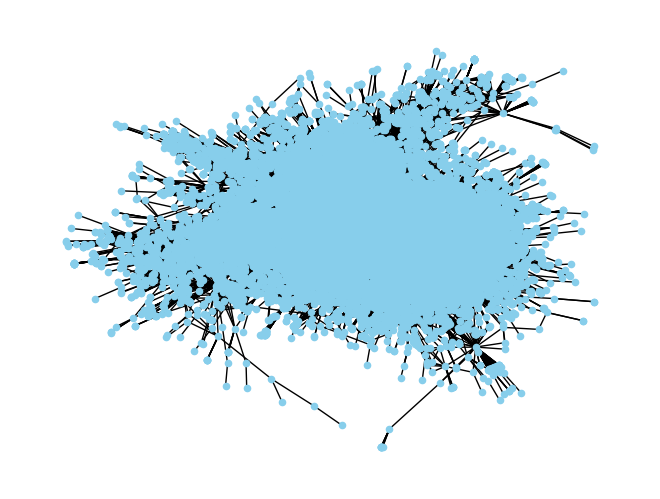

In [27]:
nx.draw(G, with_labels=False,node_size=20, node_color='skyblue')

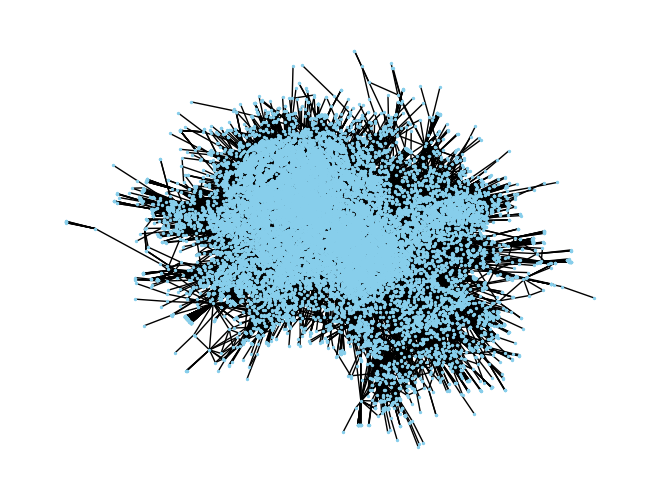

In [28]:
nx.draw(G, with_labels=False,node_size=2, node_color='skyblue')

In [5]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)

Text(0, 0.5, 'Number of Nodes')

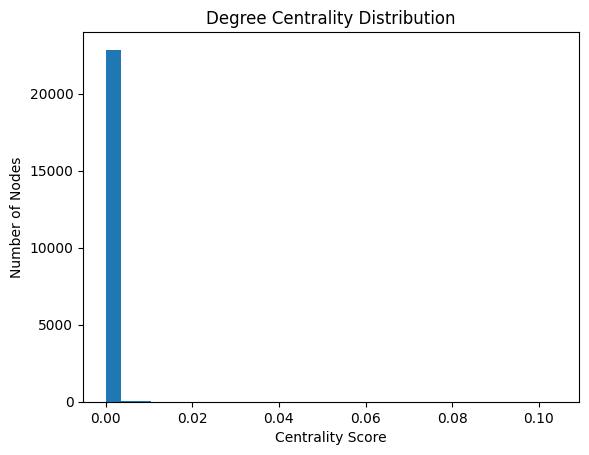

In [6]:
plt.hist(list(degree_centrality.values()), bins=30)
plt.title("Degree Centrality Distribution")
plt.xlabel("Centrality Score")
plt.ylabel("Number of Nodes")

In [13]:
# pagerank
pagerank = nx.pagerank(G)

Text(0, 0.5, 'Number of Nodes')

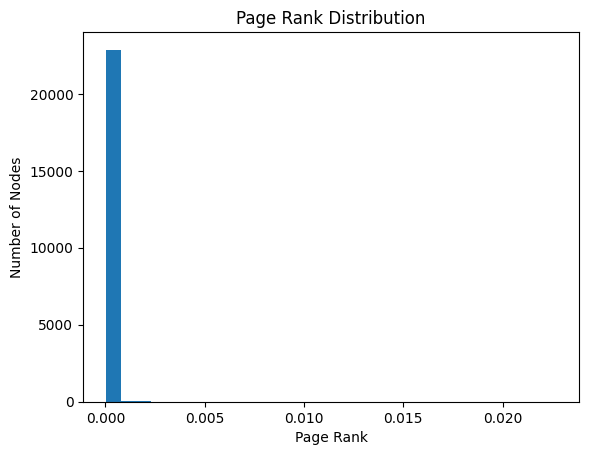

In [14]:
plt.hist(list(pagerank.values()), bins=30)
plt.title("Page Rank Distribution")
plt.xlabel("Page Rank")
plt.ylabel("Number of Nodes")

In [15]:
print("Calculating closeness centrality (can take time)...")
closeness_centrality = nx.closeness_centrality(G)

Calculating closeness centrality (can take time)...


Text(0, 0.5, 'Number of Nodes')

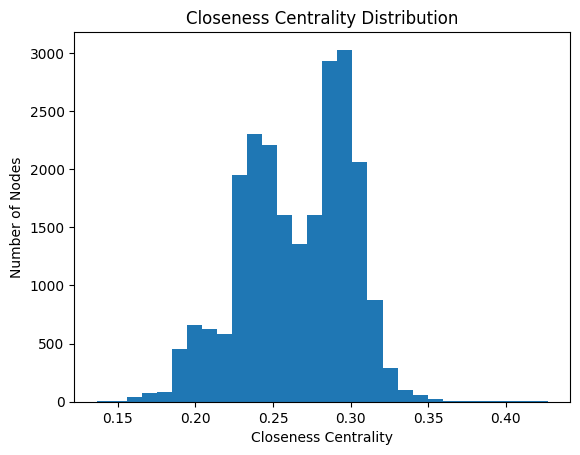

In [16]:
plt.hist(list(closeness_centrality.values()), bins=30)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")

In [16]:
print("Calculating betweenness centrality (can take a long time)...")
betweenness_centrality = nx.betweenness_centrality(G)

Calculating betweenness centrality (can take a long time)...


In [17]:
eigen_centrality = nx.eigenvector_centrality(G)

Text(0, 0.5, 'Number of Nodes')

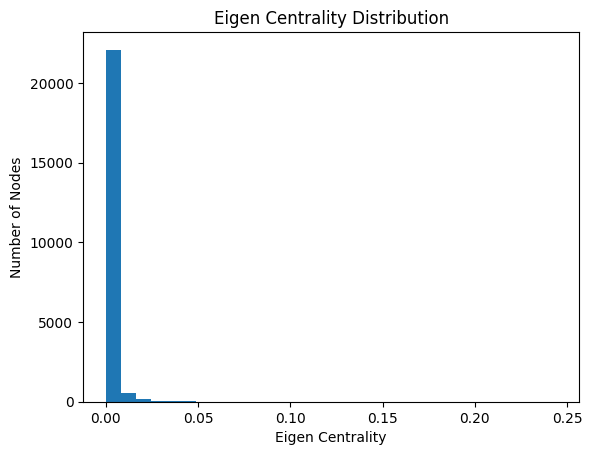

In [18]:
plt.hist(list(eigen_centrality.values()), bins=30)
plt.title("Eigen Centrality Distribution")
plt.xlabel("Eigen Centrality")
plt.ylabel("Number of Nodes")

In [17]:
# Combine all into a DataFrame
df = pd.DataFrame({
    "degree": degree_centrality,
    "closeness": closeness_centrality,
    "betweenness": betweenness_centrality,
    "pagerank": pagerank
})

In [22]:
import os

if os.path.isfile('internet/centrality_scores.csv'):
    df = pd.read_csv('internet/centrality_scores.csv')
    print(df.head(3))
    

   Unnamed: 0    degree  closeness  betweenness  pagerank
0        8001  0.009712   0.368939     0.005889  0.001535
1       64666  0.000044   0.269510     0.000000  0.000012
2        7018  0.087797   0.407474     0.111697  0.019491


In [23]:
# Execute this code in a different line, because I add this metric after betweenness code!
df['eigen'] = eigen_centrality

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22963 entries, 0 to 22962
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   22963 non-null  int64  
 1   degree       22963 non-null  float64
 2   closeness    22963 non-null  float64
 3   betweenness  22963 non-null  float64
 4   pagerank     22963 non-null  float64
 5   eigen        0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [20]:
print(df.shape)
df.info()

(22963, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 22963 entries, 8001 to 10193
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   degree       22963 non-null  float64
 1   closeness    22963 non-null  float64
 2   betweenness  22963 non-null  float64
 3   pagerank     22963 non-null  float64
dtypes: float64(4)
memory usage: 897.0+ KB


In [ ]:
# Save results to CSV
df.to_csv("internet/centrality_scores.csv")

In [31]:
# Top 5 by page closeness
df.sort_values(by='closeness', ascending=False).head()

,Unnamed: 0,degree,closeness,betweenness,pagerank,eigen
22,3356,0.056528,0.427113,0.124733,0.010900,NaN
14,1239,0.074602,0.421205,0.132111,0.016145,NaN
3,701,0.104085,0.414477,0.144697,0.022716,NaN
26,6461,0.030354,0.411144,0.038115,0.005192,NaN
39,3549,0.033272,0.410439,0.067246,0.006374,NaN


<Axes: >

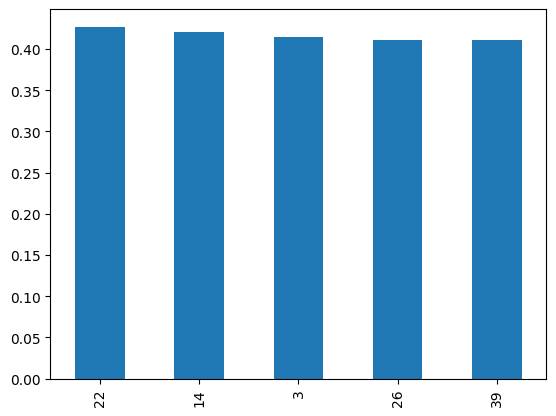

In [28]:
# Top 5 by page closeness
df['closeness'].sort_values(ascending=False).head().plot(kind='bar')

In [22]:
# Top 5 by page betweenness
df.sort_values(by='betweenness', ascending=False).head()

,degree,closeness,betweenness,pagerank
701,0.104085,0.414477,0.144697,0.022716
1239,0.074602,0.421205,0.132111,0.016145
3356,0.056528,0.427113,0.124733,0.010900
7018,0.087797,0.407474,0.111697,0.019491
174,0.054133,0.402729,0.080197,0.011198


<Axes: ylabel='betweenness'>

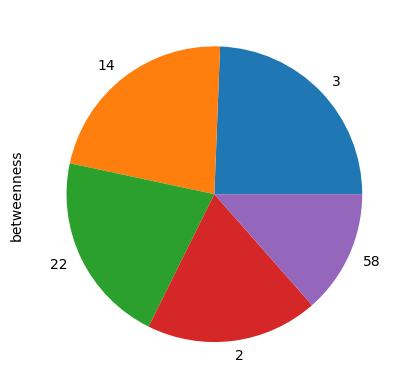

In [35]:
# Top 5 by page betweenness
df['betweenness'].sort_values(ascending=False).head().plot(kind='pie')

In [40]:
# Top 5 by page rank
df.sort_values(by='pagerank', ascending=False).head()

,Unnamed: 0,degree,closeness,betweenness,pagerank,eigen
3,701,0.104085,0.414477,0.144697,0.022716,NaN
2,7018,0.087797,0.407474,0.111697,0.019491,NaN
14,1239,0.074602,0.421205,0.132111,0.016145,NaN
54,209,0.052696,0.392936,0.068879,0.011757,NaN
58,174,0.054133,0.402729,0.080197,0.011198,NaN


<Axes: ylabel='pagerank'>

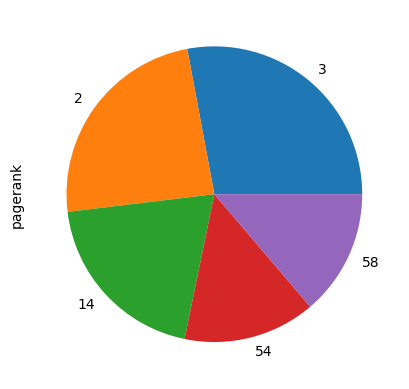

In [41]:
# Top 5 by page rank
df.sort_values(by='pagerank', ascending=False).head()['pagerank'].plot(kind='pie')

In [24]:
# Top 5 by degree centrality
df.sort_values(by='degree', ascending=False).head()

,degree,closeness,betweenness,pagerank
701,0.104085,0.414477,0.144697,0.022716
7018,0.087797,0.407474,0.111697,0.019491
1239,0.074602,0.421205,0.132111,0.016145
3356,0.056528,0.427113,0.124733,0.010900
174,0.054133,0.402729,0.080197,0.011198


In [45]:
df[df['degree'] >= 0.05]

,Unnamed: 0,degree,closeness,betweenness,pagerank,eigen
2,7018,0.087797,0.407474,0.111697,0.019491,NaN
3,701,0.104085,0.414477,0.144697,0.022716,NaN
14,1239,0.074602,0.421205,0.132111,0.016145,NaN
22,3356,0.056528,0.427113,0.124733,0.010900,NaN
54,209,0.052696,0.392936,0.068879,0.011757,NaN
58,174,0.054133,0.402729,0.080197,0.011198,NaN


<Axes: ylabel='degree'>

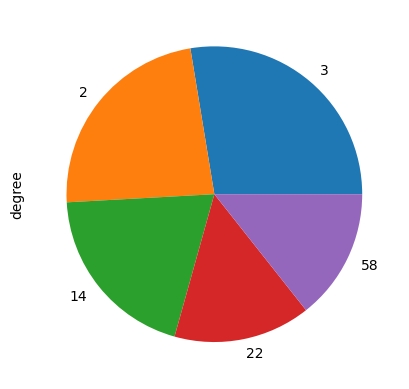

In [42]:
df.sort_values(by='degree', ascending=False).head()['degree'].plot(kind='pie')

In [ ]:
# Plotting top 5 nodes for each centrality
def plot_top_centrality(df, metric, top_n=5):
    top = df.sort_values(by=metric, ascending=False).head(top_n)
    plt.figure(figsize=(10, 5))
    top[metric].plot(kind='bar', color='skyblue')
    plt.title(f"Top {top_n} Nodes by {metric.capitalize()} Centrality")
    plt.xlabel("Node")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

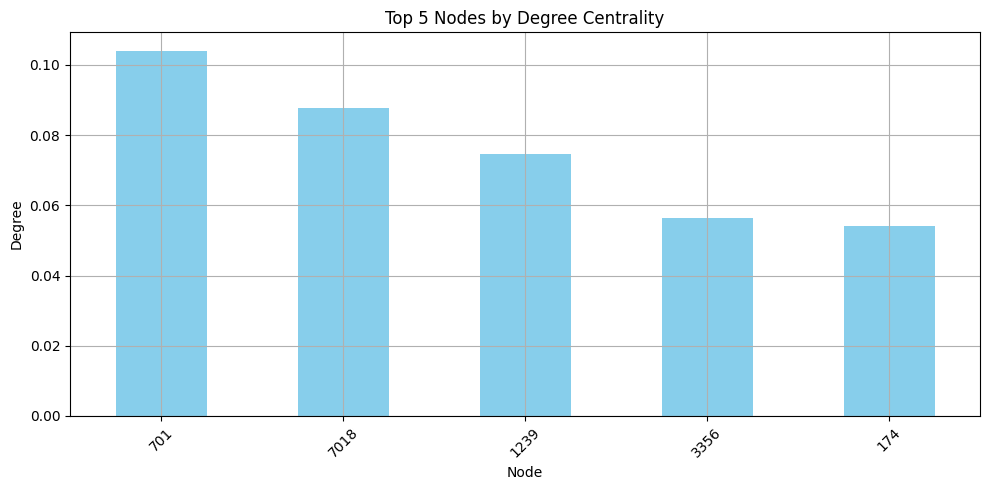

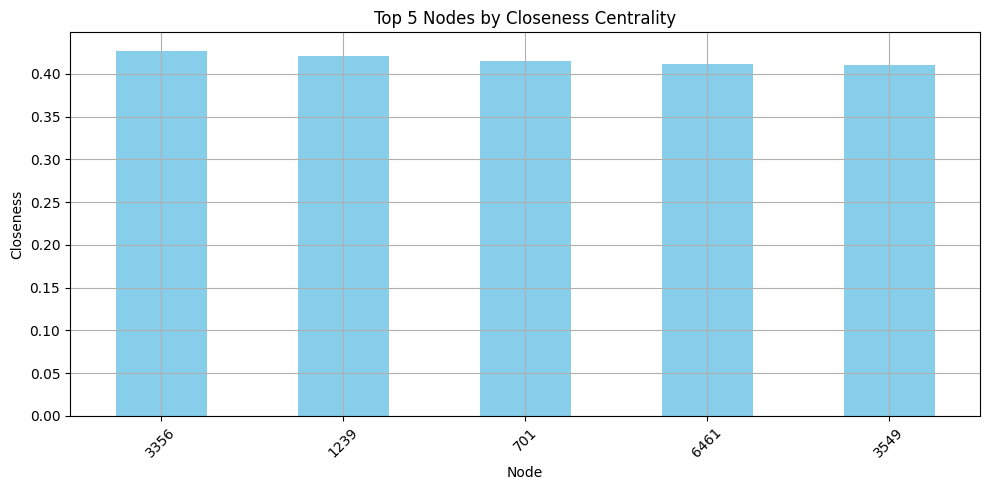

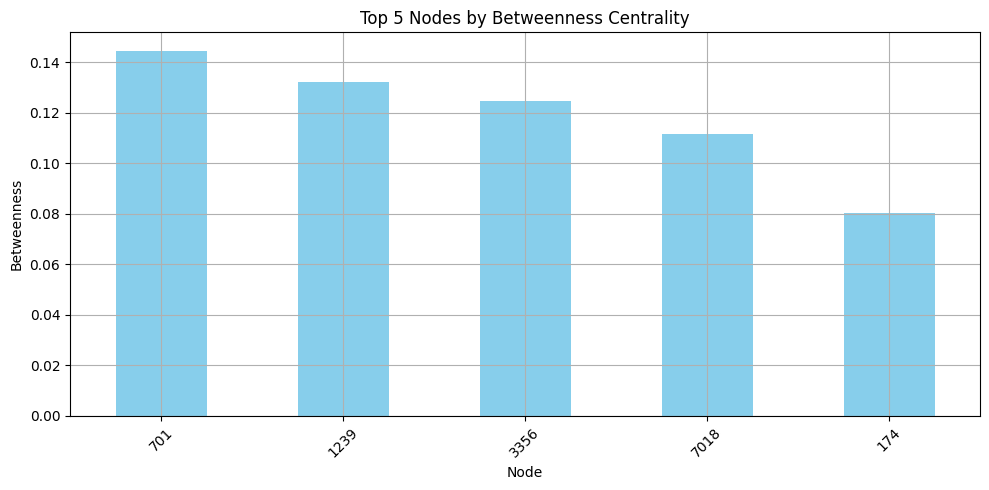

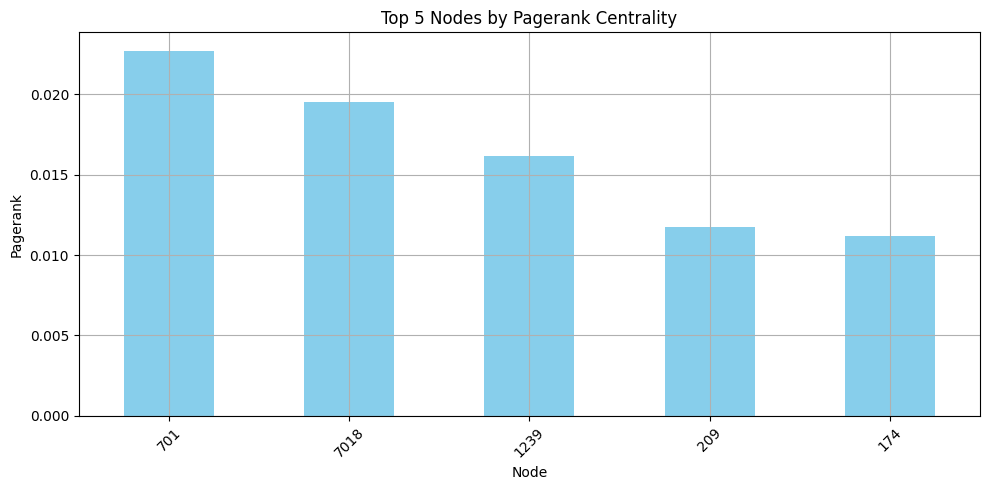

In [43]:
plot_top_centrality(df, "degree")
plot_top_centrality(df, "closeness")
plot_top_centrality(df, "betweenness")
plot_top_centrality(df, "pagerank")

# 2

In [44]:
import community

In [45]:
# Select top N important nodes (e.g. 5)
top_n = 5
top_nodes = df.sort_values(by='pagerank', ascending=False).head(top_n).index.tolist()


In [46]:
# Build subgraph of top nodes
subG = G.subgraph(top_nodes)

# Louvain clustering on subgraph
partition = community.best_partition(subG)

# Assign community attribute
nx.set_node_attributes(subG, partition, 'community')

In [47]:
# Count size of each community
from collections import Counter
community_sizes = Counter(partition.values())

print(f"\nTop {top_n} Important Nodes → Detected Communities:")
for comm, size in community_sizes.most_common():
    print(f"Community {comm}: {size} nodes")



Top 5 Important Nodes → Detected Communities:
Community 0: 5 nodes


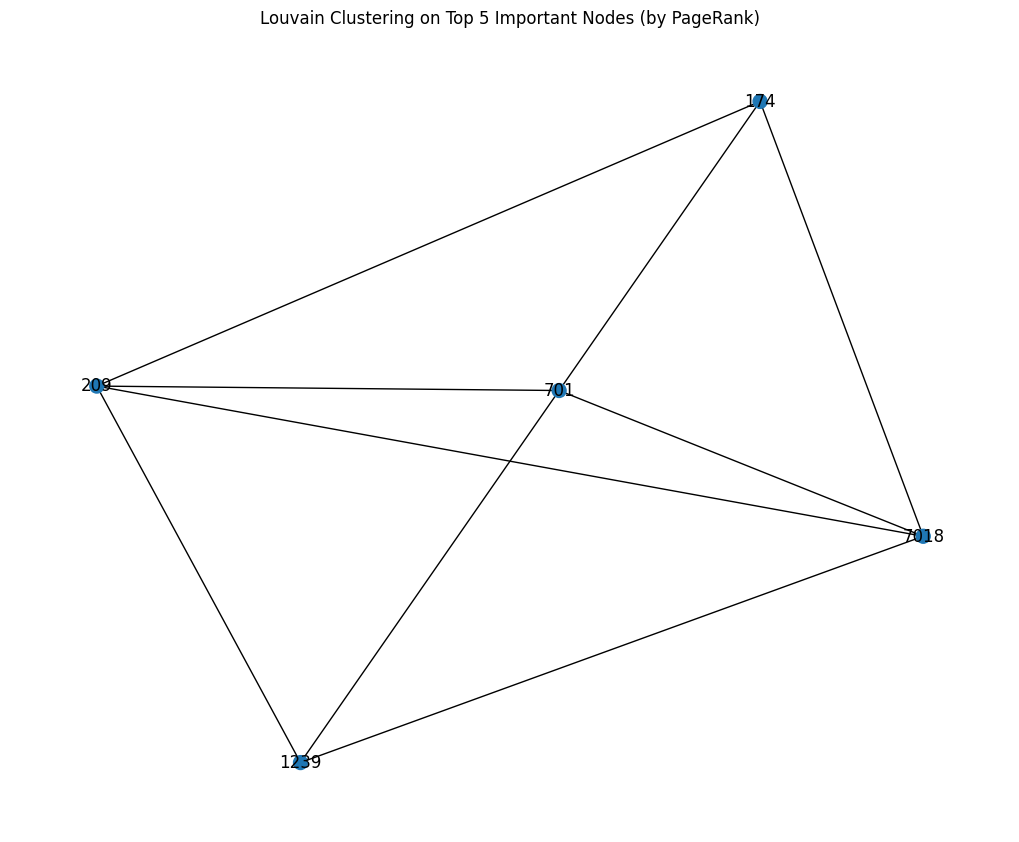

In [48]:
# Plot subgraph with community coloring
colors = [partition[n] for n in subG.nodes()]
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subG, seed=42)
nx.draw(subG, pos, node_color=colors, node_size=100, with_labels=True, cmap=plt.cm.tab20)
plt.title(f"Louvain Clustering on Top {top_n} Important Nodes (by PageRank)")
plt.show()

In [ ]:
pos = nx.spring_layout(G)

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, node in enumerate(important_nodes):
    nx.draw_networkx_nodes(G, pos, nodelist=clusters[node], node_color=colors[i], node_size=50)

nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Clusters Around Top Influential Nodes")
plt.show()

# 3

In [49]:
# Function to extract skeleton subgraph
def extract_skeleton(df, G, top_n, method_name='pagerank'):
    top_nodes = df.sort_values(by=method_name, ascending=False).head(top_n).index.tolist()
    skeleton = G.subgraph(top_nodes).copy()
    # nx.write_gml(skeleton, f"skeleton_{top_n}.gml")
    print(f"Skeleton with top {top_n} nodes saved as: skeleton_{top_n}.gml")
    return skeleton

In [50]:
# Step 2: Generate skeletons for 10, 100, 1000 nodes
skeleton_10 = extract_skeleton(df, G, 10)
skeleton_100 = extract_skeleton(df, G, 100)
skeleton_1000 = extract_skeleton(df, G, 1000)

Skeleton with top 10 nodes saved as: skeleton_10.gml
Skeleton with top 100 nodes saved as: skeleton_100.gml
Skeleton with top 1000 nodes saved as: skeleton_1000.gml


In [62]:
def plot_skeleton(graph, node_size=20):
    print(graph.number_of_edges())
    print(graph.number_of_nodes())
    nx.draw(graph, with_labels=False,node_size=node_size, node_color='orange')

38
10
1312
100
7108
1000


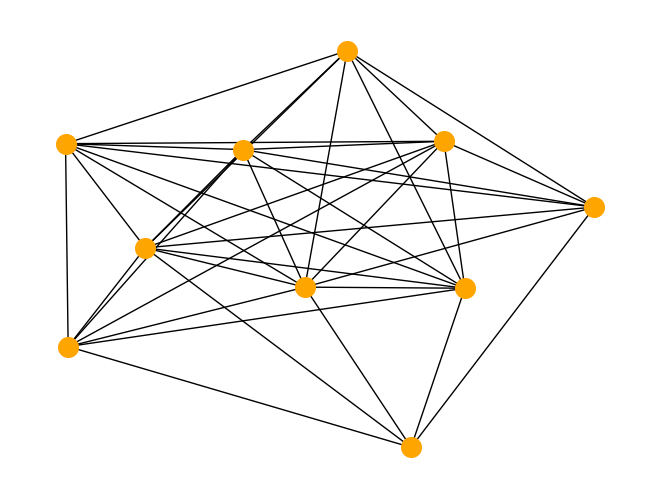

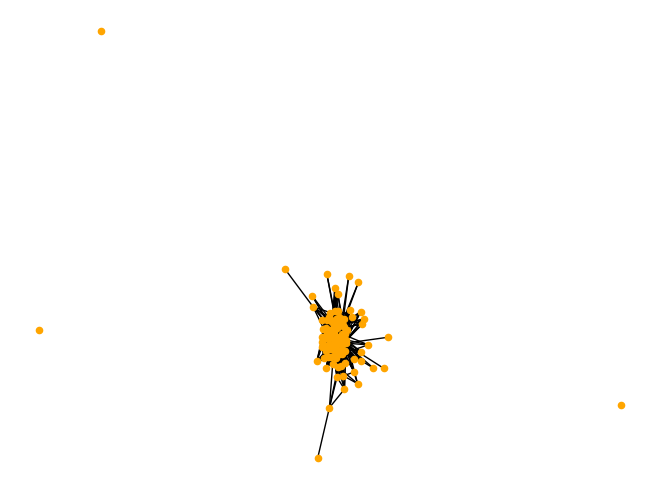

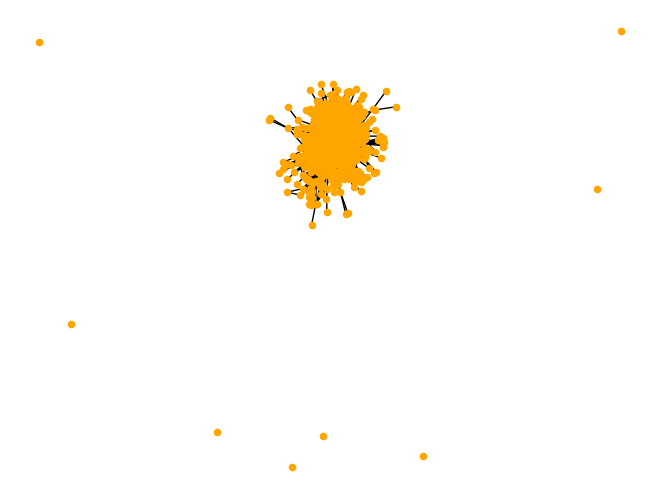

In [63]:
plot_skeleton(skeleton_10, node_size=200)
plt.figure()
plot_skeleton(skeleton_100)
plt.figure()
plot_skeleton(skeleton_1000)